In [93]:
!pip install pandas

In [94]:
from google.colab import drive
import pandas as panda
drive.mount('/content/drive', force_remount=True)
mashroom=panda.read_csv('/content/drive/My Drive/ailab5/dataset.csv')

Mounted at /content/drive


In [95]:
mashroom.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [96]:
mashroom.shape

(3124, 20)

In [97]:
mashroom.isnull()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
mashroom.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [99]:
mashroom = mashroom.dropna(axis = 0, subset = ['cap-shape', 'cap-color'])

In [100]:
mashroom.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [101]:
mashroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3108 non-null   int64  
 1   class                     3108 non-null   object 
 2   cap-shape                 3108 non-null   float64
 3   cap-surface               3108 non-null   int64  
 4   cap-color                 3108 non-null   float64
 5   bruises                   3108 non-null   object 
 6   odor                      3108 non-null   int64  
 7   stalk-shape               3108 non-null   int64  
 8   stalk-root                3108 non-null   int64  
 9   stalk-surface-above-ring  3108 non-null   int64  
 10  stalk-surface-below-ring  3108 non-null   int64  
 11  stalk-color-above-ring    3108 non-null   int64  
 12  stalk-color-below-ring    3108 non-null   int64  
 13  veil-type                 3108 non-null   int64  
 14  veil-col

In [102]:
mashroom['class'].unique()


array(['poisonous', 'edible'], dtype=object)

In [103]:
mashroom['bruises'].unique()

array(['bruises is there', 'no bruises'], dtype=object)

In [104]:
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
mashroom['class-encode']=encode.fit_transform(mashroom['class'])
mashroom['bruises-encode']=encode.fit_transform(mashroom['bruises'])

print(mashroom[['class-encode' , 'class' , 'bruises-encode' , 'bruises' ]].head())


   class-encode      class  bruises-encode           bruises
0             1  poisonous               0  bruises is there
1             0     edible               0  bruises is there
2             0     edible               0  bruises is there
3             1  poisonous               0  bruises is there
4             0     edible               1        no bruises


In [105]:
mashroom = mashroom.drop(['class' , 'bruises'] , axis=1 )

In [106]:
!pip install mglearn
!pip install sklearn
import mglearn
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [107]:
scale = MinMaxScaler()
scale.fit(mashroom)
scaleMashroom = scale.transform(mashroom)

In [108]:
mashroom_corr=mashroom.corr()
mashroom_corr

,Unnamed: 0,cap-shape,cap-surface,cap-color,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class-encode,bruises-encode
Unnamed: 0,1.000000,0.179876,-0.202910,-0.585865,0.428371,0.567590,-0.568147,0.015972,-0.075043,-0.463790,-0.471325,NaN,NaN,NaN,0.054548,-0.147660,0.352566,-0.530417,-0.010749,-0.072947
cap-shape,0.179876,1.000000,-0.043388,-0.255368,0.168214,0.189500,-0.143281,0.006085,0.000518,-0.154872,-0.154208,NaN,NaN,NaN,0.019624,-0.022923,0.161163,-0.146982,0.040377,0.011017
cap-surface,-0.202910,-0.043388,1.000000,0.284322,-0.266163,-0.394265,0.157790,0.180720,0.258512,0.129838,0.123049,NaN,NaN,NaN,0.260261,-0.016798,-0.008518,0.181651,0.130116,-0.348183
cap-color,-0.585865,-0.255368,0.284322,1.000000,-0.544839,-0.535158,0.322707,0.027766,0.071635,0.372919,0.374753,NaN,NaN,NaN,0.031869,0.143697,-0.318545,0.334604,0.067145,-0.081980
odor,0.428371,0.168214,-0.266163,-0.544839,1.000000,0.532524,-0.053223,-0.157331,-0.264741,-0.160221,-0.167821,NaN,NaN,NaN,-0.262335,-0.094061,0.065476,-0.182441,0.167404,0.223775
stalk-shape,0.567590,0.189500,-0.394265,-0.535158,0.532524,1.000000,-0.385669,-0.249943,-0.339544,-0.264269,-0.274179,NaN,NaN,NaN,-0.407543,0.109052,0.016743,-0.690196,-0.459459,0.244402
stalk-root,-0.568147,-0.143281,0.157790,0.322707,-0.053223,-0.385669,1.000000,-0.320695,-0.129765,0.502047,0.505144,NaN,NaN,NaN,-0.511577,-0.055792,-0.507730,0.567075,0.161222,0.502354
stalk-surface-above-ring,0.015972,0.006085,0.180720,0.027766,-0.157331,-0.249943,-0.320695,1.000000,0.434289,-0.120149,-0.126883,NaN,NaN,NaN,0.656862,0.071802,0.420007,0.026194,0.062866,-0.600437
stalk-surface-below-ring,-0.075043,0.000518,0.258512,0.071635,-0.264741,-0.339544,-0.129765,0.434289,1.000000,-0.069062,-0.074955,NaN,NaN,NaN,0.647493,0.060499,0.419955,0.100240,0.027833,-0.601951
stalk-color-above-ring,-0.463790,-0.154872,0.129838,0.372919,-0.160221,-0.264269,0.502047,-0.120149,-0.069062,1.000000,0.397969,NaN,NaN,NaN,-0.228263,0.131768,-0.380651,0.317062,0.019195,0.214951


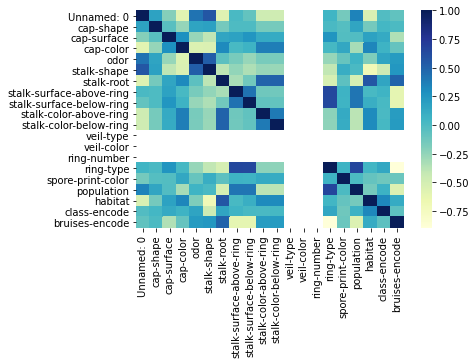

In [109]:
import seaborn as vis
vis.heatmap(mashroom_corr , cmap ='YlGnBu')

In [110]:
mashroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3108 non-null   int64  
 1   cap-shape                 3108 non-null   float64
 2   cap-surface               3108 non-null   int64  
 3   cap-color                 3108 non-null   float64
 4   odor                      3108 non-null   int64  
 5   stalk-shape               3108 non-null   int64  
 6   stalk-root                3108 non-null   int64  
 7   stalk-surface-above-ring  3108 non-null   int64  
 8   stalk-surface-below-ring  3108 non-null   int64  
 9   stalk-color-above-ring    3108 non-null   int64  
 10  stalk-color-below-ring    3108 non-null   int64  
 11  veil-type                 3108 non-null   int64  
 12  veil-color                3108 non-null   int64  
 13  ring-number               3108 non-null   int64  
 14  ring-typ

In [111]:
from sklearn.model_selection import train_test_split
features = mashroom[[ 'cap-surface','odor','stalk-shape', 'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',  'cap-color',  'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat' , 'bruises-encode']]
label = mashroom[['class-encode']]
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.25, stratify = panda.DataFrame(label), random_state = 0)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as num
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_train = knn.predict(x_test)
print("Test set score: {:.2f}".format(knn.score(x_test, y_test)))

Test set score: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
